In [11]:
!pip install catboost
import catboost

In [12]:
from sklearn.datasets import make_classification, make_regression
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from numpy import std, mean
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score


from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

from xgboost import XGBClassifier, XGBRegressor

from lightgbm import LGBMClassifier, LGBMRegressor

from catboost import CatBoostClassifier, CatBoostRegressor



In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
os.chdir('/content/drive/MyDrive/Synosis Project 1')

In [15]:

os.path.isfile('train-metadata V4.csv')

True

Accuracy: 0.827 (0.047)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:36:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_split_gain", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test Set: 0.858 (85.8%)
Feature Importance:
                         Feature  Importance
15             tbp_lv_norm_color    0.258648
3                       tbp_lv_H    0.228952
0         clin_size_long_diam_mm    0.178502
13            tbp_lv_minorAxisMM    0.067067
21  tbp_lv_dnn_lesion_confidence    0.058715
6                 tbp_lv_areaMM2    0.054410
14        tbp_lv_nevi_confidence    0.039744
19                tbp_lv_stdLExt    0.026878
12            tbp_lv_deltaLBnorm    0.022708
2                    tbp_lv_Bext    0.021274
20             tbp_lv_symm_2axis    0.014718
5                       tbp_lv_L    0.009396
10                 tbp_lv_deltaL    0.006898
18                   tbp_lv_stdL    0.005675
1                       tbp_lv_B    0.004694
17   tbp_lv_radial_color_std_max    0.001721
4                    tbp_lv_Hext    0.000000
16            tbp_lv_perimeterMM    0.000000
9                  tbp_lv_deltaB    0.000000
8                  tbp_lv_deltaA    0.000000

<Figure size 1000x600 with 0 Axes>

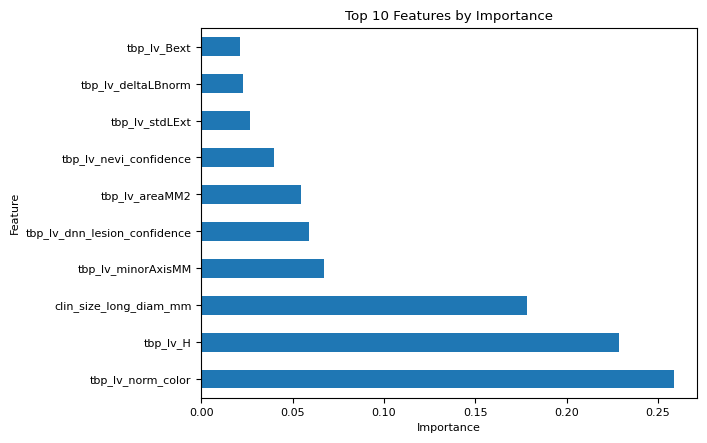

Tree visualization saved to xgboost_tree.pdf


<Figure size 6000x18000 with 0 Axes>

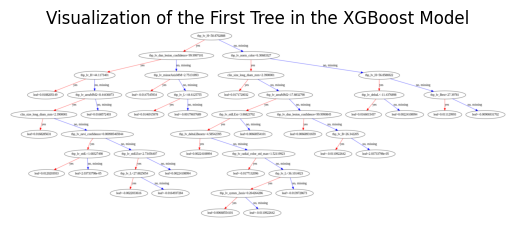

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_tree, to_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
import numpy as np

random_seed = 99
np.random.seed(random_seed)

data = pd.read_csv("train-metadata V4.csv")

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)

model = XGBClassifier(n_estimators=1, n_jobs=-1, num_leaves=50, max_depth=10, min_split_gain=0.0, learning_rate=0.01, random_state=random_seed)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=random_seed)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy on Test Set: {accuracy:.3f} ({accuracy * 100:.1f}%)")

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

dot_data = to_graphviz(model, num_trees=0, show_class=True)
output_path = 'xgboost_tree'

dot_data.render(output_path, format='pdf')
print(f"Tree visualization saved to {output_path}.pdf")


plt.figure(figsize=(20, 60), dpi=300)
plt.rcParams['font.size'] = 10
plot_tree(model, num_trees=0, show_info=['split', 'value'])
plt.title("Visualization of the First Tree in the XGBoost Model")
plt.show()


Accuracy: 0.831 (0.049)
[LightGBM] [Info] Number of positive: 294, number of negative: 295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4236
[LightGBM] [Info] Number of data points in the train set: 589, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499151 -> initscore=-0.003396
[LightGBM] [Info] Start training from score -0.003396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy on Test Set: 0.863 (86.3%)
Feature Importance:
                         Feature  Importance
0         clin_size_long_diam_mm           3
3                       tbp_lv_H           3
5                       tbp_lv_L           3
6                 tbp_lv_areaMM2           2
12            tbp_lv_deltaLBnorm           1
19                tbp_lv_stdLExt           1
15             tbp_lv_norm_color          

<Figure size 1000x600 with 0 Axes>

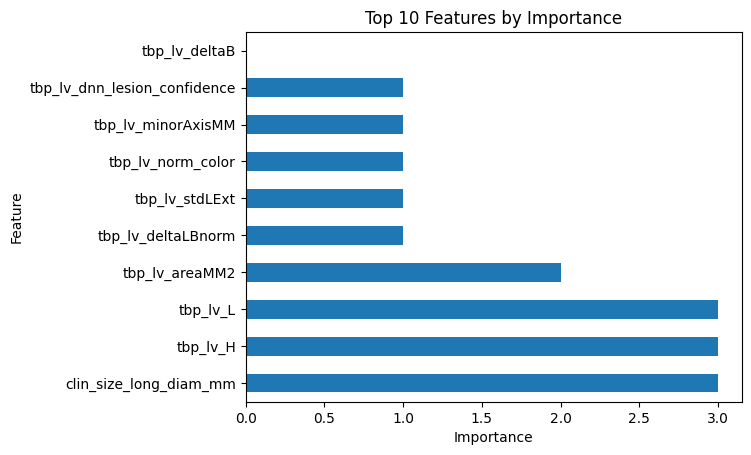

Tree visualization saved to lightgbm_tree.pdf


<Figure size 10000x30000 with 0 Axes>

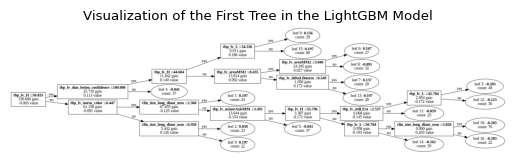

In [17]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std

seed_value = 99
np.random.seed(seed_value)
random.seed(seed_value)


data = pd.read_csv("train-metadata V4.csv")

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed_value)

model = LGBMClassifier(n_estimators=1, num_leaves=50, random_state=seed_value)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy on Test Set: {accuracy:.3f} ({accuracy * 100:.1f}%)")

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

from lightgbm import plot_tree, create_tree_digraph

tree_index = 0
output_path = 'lightgbm_tree'

dot_data = create_tree_digraph(model, tree_index=tree_index)

dot_data.render(output_path, format='pdf')

print(f"Tree visualization saved to {output_path}.pdf")


plt.figure(figsize=(20, 60), dpi=500)
plt.rcParams['font.size'] = 8
plot_tree(model, tree_index=0, show_info=['split_gain', 'internal_value', 'leaf_count'])
plt.title("Visualization of the First Tree in the LightGBM Model")
plt.show()


In [18]:
!pip install catboost
import catboost
from catboost import CatBoostClassifier, Pool
from graphviz import Digraph


Accuracy: 0.804 (0.048)
Accuracy on Test Set: 0.868 (86.8%)
Feature Importance:
                         Feature  Importance
6                 tbp_lv_areaMM2   37.775522
3                       tbp_lv_H   25.755969
0         clin_size_long_diam_mm   18.194436
16            tbp_lv_perimeterMM    7.320137
21  tbp_lv_dnn_lesion_confidence    6.481997
9                  tbp_lv_deltaB    4.471939
5                       tbp_lv_L    0.000000
14        tbp_lv_nevi_confidence    0.000000
20             tbp_lv_symm_2axis    0.000000
19                tbp_lv_stdLExt    0.000000
18                   tbp_lv_stdL    0.000000
17   tbp_lv_radial_color_std_max    0.000000
2                    tbp_lv_Bext    0.000000
15             tbp_lv_norm_color    0.000000
13            tbp_lv_minorAxisMM    0.000000
4                    tbp_lv_Hext    0.000000
12            tbp_lv_deltaLBnorm    0.000000
1                       tbp_lv_B    0.000000
10                 tbp_lv_deltaL    0.000000
8                  t

<Figure size 1000x600 with 0 Axes>

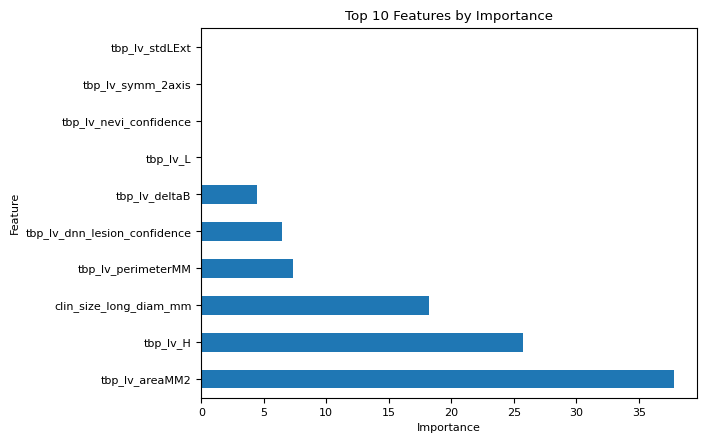

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std

random_seed = 99
np.random.seed(random_seed)

data = pd.read_csv("train-metadata V4.csv")

X = data.drop(columns=['target'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

model = CatBoostClassifier(n_estimators=1, depth=7, learning_rate=1.0, verbose=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = (y_pred == y_test).mean()
print(f"Accuracy on Test Set: {accuracy:.3f} ({accuracy * 100:.1f}%)")

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Features by Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

